# Comparing processe met data for s2p3 with the original data as check

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import cartopy.crs as ccrs
import iris
import iris.coord_categorisation

In [61]:
year = 2007
day_number = 150


Read in from extracted processed tar.gz file

In [62]:
directory = '/data/BatCaveNAS/ph290/ecmwf_era5/day_mean/output_processed/gbrish/'
files = glob.glob(directory+'meterological_datalat*.*lon*.*_'+str(year)+'.dat')

lats=np.zeros(len(files),int).astype(str)
lons=np.zeros(len(files),int).astype(str)

for i,file in enumerate(files):
    data = file.split('meterological_datalat')[1].split('lon')
    lats[i] = (data[0])
    lons[i] = (data[1].split('_')[0])

lats = np.unique(lats)
lats_float = lats.astype(float)
ind = np.argsort(lats_float)
lats_float= lats_float[ind]
lats = lats[ind]

lons = np.unique(lons)
lons_float = lons.astype(float)
ind = np.argsort(lons_float)
lons_float= lons_float[ind]
lons = lons[ind]



data = np.zeros([len(lons),len(lats)])

for i,lat in enumerate(lats):
    for j,lon in enumerate(lons):
        try:  
            file = directory+'meterological_datalat'+lat+'lon'+lon+'_'+str(year)+'.dat'
            with open(file, 'r') as f:
                file_cont = list(csv.reader(f))
                data[j,i] = float(file_cont[day_number][0].split()[4])
        except:
            pass


data = np.ma.masked_where(data == 0.0,data)

reading in raw era5 data

In [64]:
era5_tas = iris.load_cube('/data/BatCaveNAS/ph290/ecmwf_era5/day_mean/region_of_interest/tas.nc') - 273.15
iris.coord_categorisation.add_year(era5_tas, 'time', name='year')
era5_tas = era5_tas[np.where(era5_tas.coord('year').points == year)][day_number]


lon_west = 143.0
lon_east = 152.0

lat_south = -22.0
lat_north = -6.0
cube_region_tmp = era5_tas.intersection(longitude=(lon_west, lon_east))
era_cube_region = cube_region_tmp.intersection(latitude=(lat_south, lat_north))

plot data

Text(0.5,1,'processed met data plotted on top of raw met data')

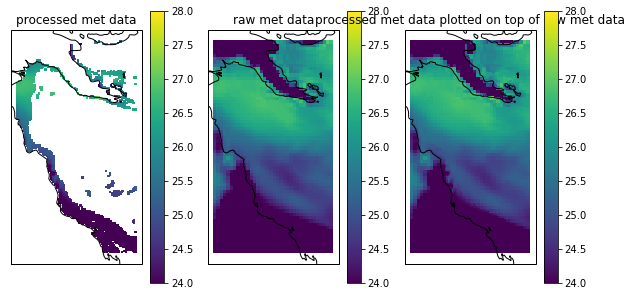

In [65]:


fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree())
pl = ax.pcolormesh(lons_float,lats_float,np.flipud(np.rot90(data)),transform=ccrs.PlateCarree(),vmin=24.0,vmax=28.0)
ax.coastlines('50m')
plt.colorbar(pl)
plt.title('processed met data')

ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree())
pl2 = ax2.pcolormesh(era_cube_region.coord('longitude').points,era_cube_region.coord('latitude').points,era_cube_region.data,transform=ccrs.PlateCarree(),vmin=24.0,vmax=28.0)
ax2.coastlines('50m')
plt.colorbar(pl2)
plt.title('raw met data')

ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree())
pl3 = ax3.pcolormesh(era_cube_region.coord('longitude').points,era_cube_region.coord('latitude').points,era_cube_region.data,transform=ccrs.PlateCarree(),vmin=24.0,vmax=28.0)
pl4 = ax3.pcolormesh(lons_float,lats_float,np.flipud(np.rot90(data)),transform=ccrs.PlateCarree(),vmin=24.0,vmax=28.0)
ax3.coastlines('50m')
plt.colorbar(pl3)
plt.title('processed met data plotted on top of raw met data')


